- Dataset: Loan Prediction Based on Customer Behaviour (training and test data)
- Background: Bank wants to know who possible defaulters are for the consumer loan product using historic data. Hence when the bank acquire new customers, they want to know which customers are risky and not risky.

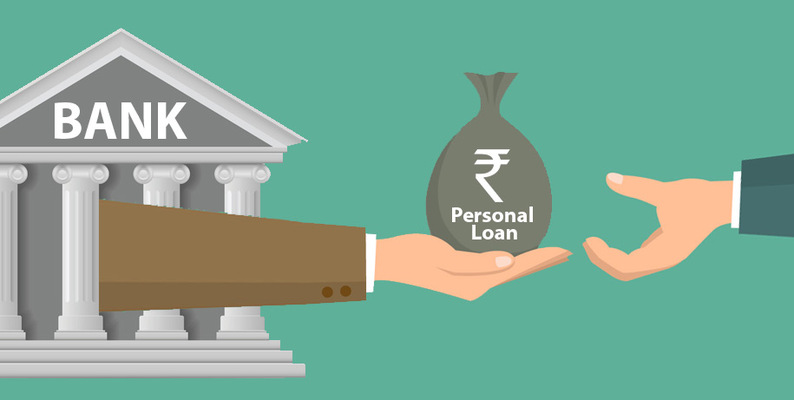

# Import

In [1]:
!pip install scikit-plot

In [2]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
import scikitplot as skplt

# data split
from sklearn.model_selection import train_test_split

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('Training Data.csv')

# Data Profiling and Preprocessing

## Data Profiling

In [4]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [6]:
# check amount of income
df.Income.value_counts()

7936020    77
9775375    71
1996629    71
9345456    70
1886371    40
           ..
8927336     1
5656901     1
8171741     1
3164826     1
9070230     1
Name: Income, Length: 41920, dtype: int64

In [7]:
# check amount of age
df.Age.value_counts()

27    5197
66    5092
48    4967
33    4921
41    4827
45    4806
54    4785
68    4772
35    4643
50    4624
69    4617
76    4585
55    4563
25    4543
72    4533
79    4505
60    4504
59    4498
53    4490
47    4483
30    4468
78    4455
22    4430
34    4414
57    4394
58    4368
56    4344
24    4326
23    4322
62    4311
31    4257
70    4251
61    4235
40    4233
43    4206
21    4205
49    4203
26    4156
37    4153
71    4150
42    4134
64    4132
29    4109
67    3995
65    3969
74    3954
63    3942
77    3916
28    3901
32    3834
75    3829
39    3800
38    3793
46    3627
44    3622
73    3569
36    3444
51    3397
52    3197
Name: Age, dtype: int64

In [8]:
# check amount of experience
df.Experience.value_counts()

6     13158
9     12936
12    12800
18    12601
10    12503
5     12441
14    12369
19    12287
17    12131
16    12106
3     12069
15    11993
4     11807
13    11713
1     11575
11    11449
20    11350
8     11350
7     11232
2     11087
0     11043
Name: Experience, dtype: int64

In [9]:
# check amount of status
df['Married/Single'].value_counts()

single     226272
married     25728
Name: Married/Single, dtype: int64

In [10]:
# check amount of house ownership
df.House_Ownership.value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [11]:
# check amount of car ownership
df.Car_Ownership.value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [12]:
# check amount of profession
df.Profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [13]:
# check amount of city
df.CITY.value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [14]:
# check amount of city
df.STATE.value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [15]:
# check amount of current job in years
df.CURRENT_JOB_YRS.value_counts()

3     29460
4     28339
5     25091
6     23491
7     19925
8     18874
9     17132
10    15768
11    13595
1     11575
2     11087
0     11043
12    10605
13     9099
14     6916
Name: CURRENT_JOB_YRS, dtype: int64

In [16]:
# check amount of current house in years
df.CURRENT_HOUSE_YRS.value_counts()

11    51873
12    51791
13    50659
14    49003
10    48674
Name: CURRENT_HOUSE_YRS, dtype: int64

In [17]:
# check amount of risk flag
df.Risk_Flag.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

## Data Cleaning

In [18]:
# check missing values
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [19]:
# check duplicates
df.duplicated().sum()

0

## Data Preprocessing

In [20]:
# drop unnecessary columns
df.drop('Id', axis = 1, inplace = True)

# rename columns of married/single
df.rename(columns={"Married/Single":"Married_Single"}, inplace=True)

# check data type
df.head()

,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married_Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 23.1+ MB


# EDA

In [22]:
# create new dataframe
df_new = df.iloc[:, [0,1,2,9,10]]
df_new.head(3)

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,3,13
1,7574516,40,10,9,13
2,3991815,66,4,4,10


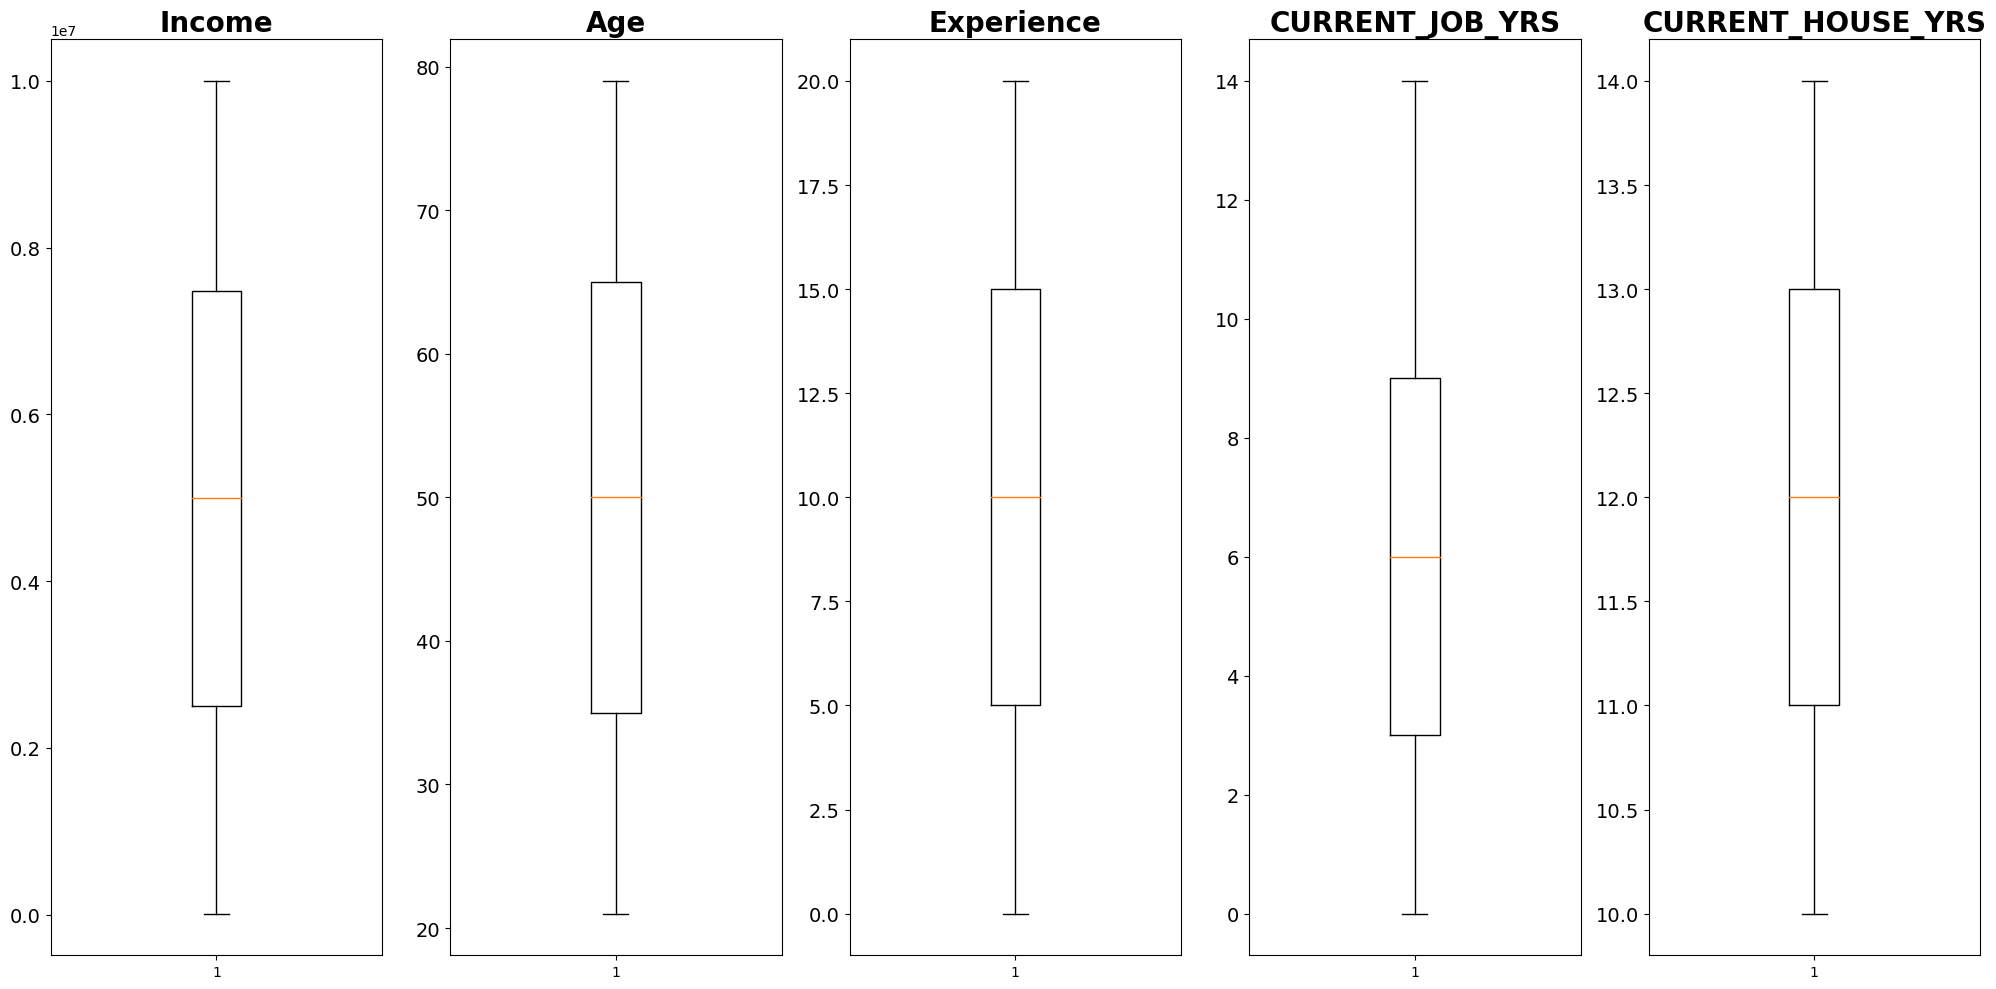

In [23]:
# boxplot to detect outliers
red_circle=dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig,axs = plt.subplots(1, len(df_new.columns),figsize=(20,10))
for i, ax in enumerate(axs.flat):
  ax.boxplot(df_new.iloc[:,i], flierprops=red_circle)
  ax.set_title(df_new.columns[i], fontsize=20, fontweight = 'bold')
  ax.tick_params(axis='y', labelsize=14)

plt.tight_layout()

There is no outlier detected in the feature columns

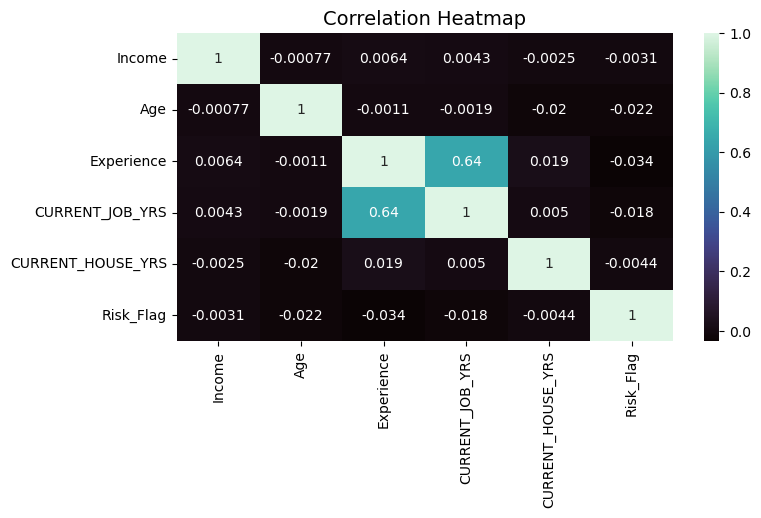

In [24]:
# heatmap for multicolinearity check
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(method='spearman'), cmap = 'mako', annot = True)
plt.title('Correlation Heatmap', fontsize = 14);

As we can see from the graph above, there is no multicolinearity (high correlation) between the dependent variables. Therefore, it is safe to proceed to the next process.

## Risk Flag

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

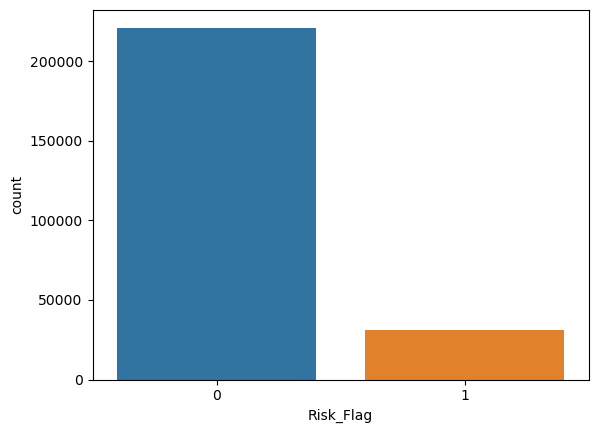

In [26]:
# check variable of risk flag
sns.countplot(data = df, x = 'Risk_Flag')

In [27]:
# calculate percentage of total customers who defaulted
100 * (len(df[df['Risk_Flag']==1].index) / len(df.index))

12.3

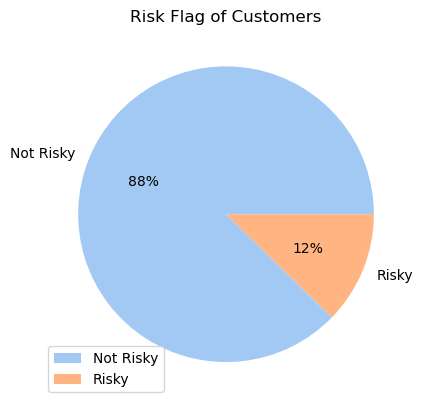

In [28]:
#define data
data = [87.7, 12.3]
labels = ['Not Risky', 'Risky']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Risk Flag of Customers')
plt.legend(labels, loc='lower left')
plt.show()

There are more customers who didn't default than those who defaulted. The percentage of total customers who defaulted is 12.3%.

## Age

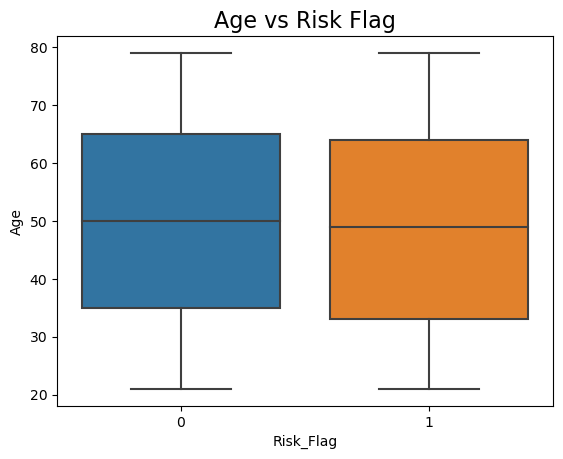

In [29]:
# check variable of age
plt.title('Age vs Risk Flag', fontsize=16)
sns.boxplot(data = df, x = 'Risk_Flag', y = 'Age')
plt.show()

It seems that age doesn't affect much on the risk flag of the customers

## Experience

<AxesSubplot:title={'center':'Experience vs Risk Flag'}, xlabel='Risk_Flag', ylabel='Experience'>

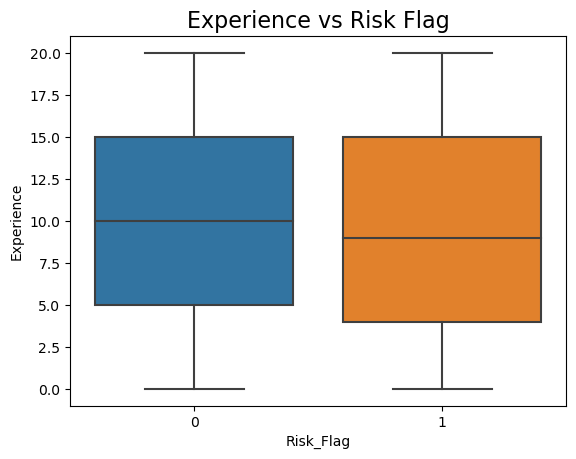

In [30]:
# check variable of risk experience
plt.title('Experience vs Risk Flag', fontsize=16)
sns.boxplot(data = df, x = 'Risk_Flag', y = 'Experience')

The customers who defaulted generally have lower years of experience than those who didn't default.

## Marital Status

<AxesSubplot:title={'center':'Marital Status vs Risk Flag'}, xlabel='Married_Single', ylabel='count'>

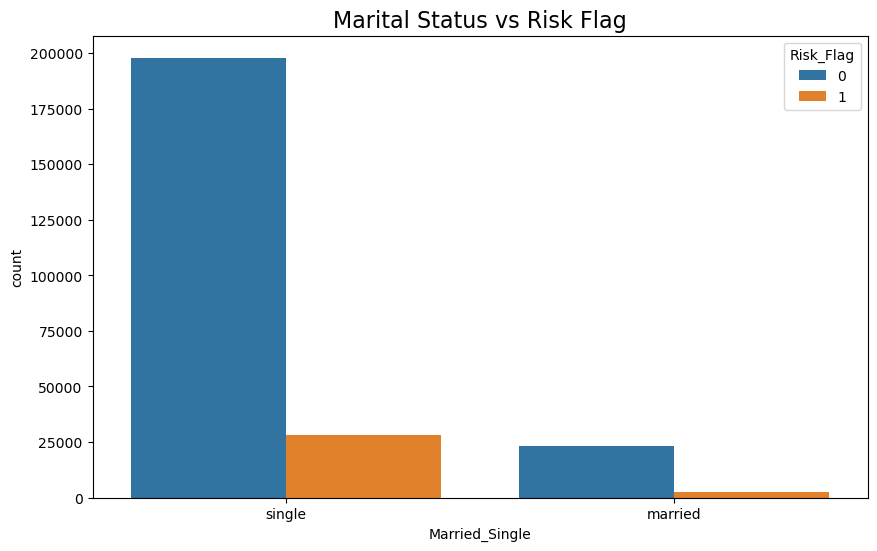

In [31]:
# check variable of marital status
plt.figure(figsize=(10,6))
plt.title('Marital Status vs Risk Flag', fontsize=16)
sns.countplot(data = df, x = 'Married_Single', hue = 'Risk_Flag')

In [32]:
# check risk value by marital status category
df.groupby('Married_Single').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

Married_Single
single     12.533588
married    10.245647
Name: Risk_Flag, dtype: float64

Mostly customers who take bank loan are single/not married. The percentage of single customers who defaulted are also higher than those who are married with the comparison 12.5% vs 10.2%.

## House Ownership

<AxesSubplot:title={'center':'House Ownership vs Risk Flag'}, xlabel='House_Ownership', ylabel='count'>

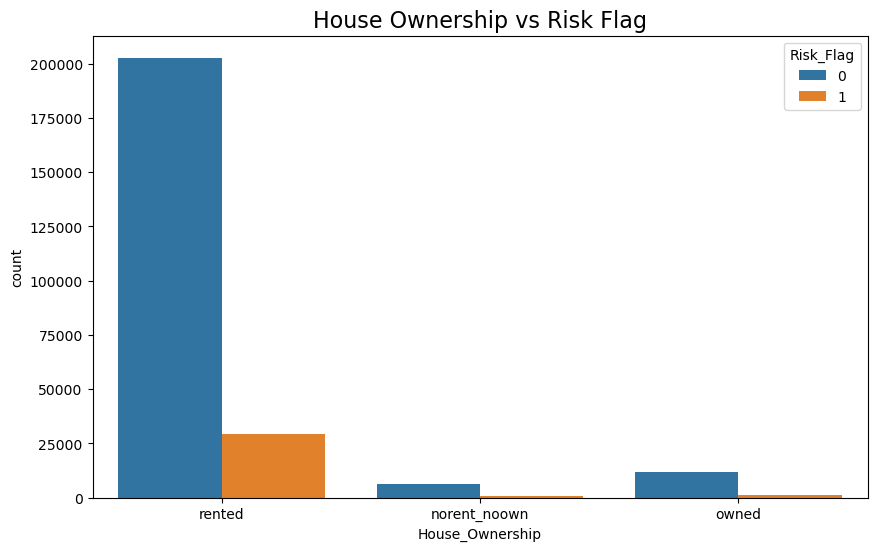

In [33]:
# check variable of house ownership
plt.figure(figsize=(10,6))
plt.title('House Ownership vs Risk Flag', fontsize=16)
sns.countplot(data = df, x = 'House_Ownership', hue = 'Risk_Flag')

In [34]:
# check risk value by house ownership category
df.groupby('House_Ownership').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

House_Ownership
rented          12.557676
norent_noown     9.952673
owned            8.979718
Name: Risk_Flag, dtype: float64

Mostly customers who take bank loan have rented type of house ownership. The percentage of customers who rented the house and defaulted are also higher than those who didn't rent and owned the house with the comparison 12.5% vs 9.9% vs 8.9%.

## Car Ownership

<AxesSubplot:title={'center':'Car Ownership vs Risk Flag'}, xlabel='Car_Ownership', ylabel='count'>

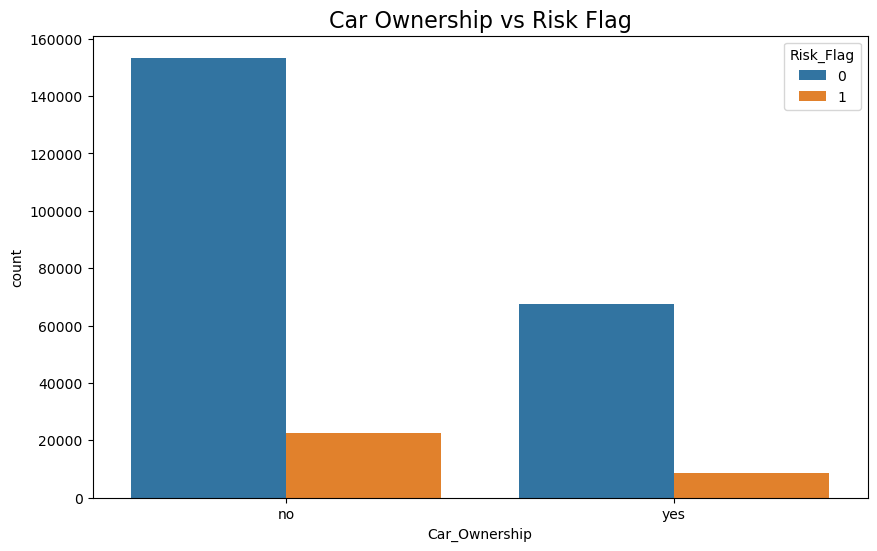

In [35]:
# check variable of car ownership
plt.figure(figsize=(10,6))
plt.title('Car Ownership vs Risk Flag', fontsize=16)
sns.countplot(data = df, x = 'Car_Ownership', hue = 'Risk_Flag')

In [36]:
# check risk value by car ownership category
df.groupby('Car_Ownership').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)

Car_Ownership
no     12.818750
yes    11.098684
Name: Risk_Flag, dtype: float64

Mostly customers who take bank loan didn't own a car. The percentage of customers who didn't own a car and defaulted are also higher than those who owned a car with the comparison 12.8% vs 11%.

## Profession

In [37]:
# top 10 professions with the highest risk flag score
df_profession = df.groupby('Profession').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False)
df_profession[:10]

Profession
Police_officer          16.405164
Chartered_Accountant    15.357222
Army_officer            15.211328
Surveyor                15.146373
Software_Developer      14.842668
Scientist               14.432127
Geologist               14.426370
Civil_engineer          13.583189
Official                13.579643
Firefighter             13.578877
Name: Risk_Flag, dtype: float64

Text(0.5, 1.0, 'Top 10 Profession with the Highest Risk Flag Score')

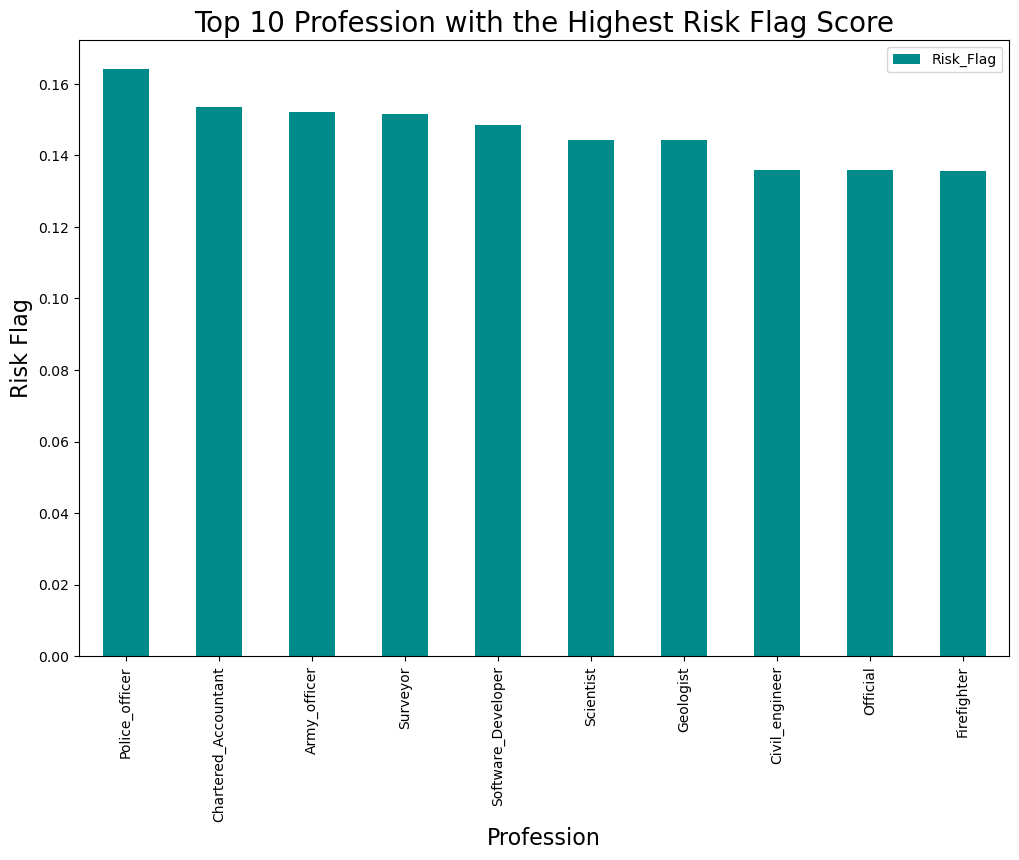

In [38]:
# top 10 profession with the highest risk flag score
top_risky_profession = df.groupby('Profession').agg({'Risk_Flag':'mean'})
top_risky_profession = top_risky_profession.sort_values('Risk_Flag', ascending = False)
top_risky_profession = top_risky_profession[:10]

top_risky_profession.plot.bar(color = 'darkcyan', figsize=(12,8))
plt.xlabel('Profession', fontsize = 16)
plt.ylabel('Risk Flag', fontsize = 16)
plt.title('Top 10 Profession with the Highest Risk Flag Score', fontsize=20)

## City

In [39]:
# check top 10 cities with the highest risk flag
df.groupby('CITY').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False).head(10)

CITY
Bhubaneswar    32.619440
Gwalior        27.272727
Bettiah[33]    26.695842
Kochi          25.286160
Raiganj        23.955432
Purnia[26]     23.886640
Barasat        23.870220
Sikar          23.845194
Buxar[37]      23.147208
Satna          22.568093
Name: Risk_Flag, dtype: float64

## State

In [40]:
# check top 10 states with the highest risk flag
df.groupby('STATE').Risk_Flag.apply(lambda x: x.sum()/x.size * 100).sort_values(ascending=False).head(10)

STATE
Manipur              21.554770
Tripura              16.810878
Kerala               16.709733
Jammu_and_Kashmir    15.898876
Madhya_Pradesh       15.436907
Odisha               14.255045
Rajasthan            14.083279
Jharkhand            13.329615
Chhattisgarh         13.328117
Himachal_Pradesh     13.325330
Name: Risk_Flag, dtype: float64

## Current job in years

<AxesSubplot:xlabel='CURRENT_JOB_YRS', ylabel='count'>

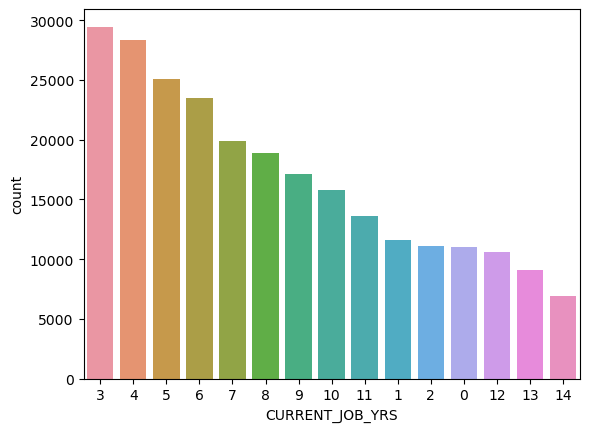

In [41]:
# check variable of current job in years
sns.countplot(data = df, x = 'CURRENT_JOB_YRS', order = df['CURRENT_JOB_YRS'].value_counts().index)

Text(0.5, 1.0, 'Current Job Duration vs Risk Flag')

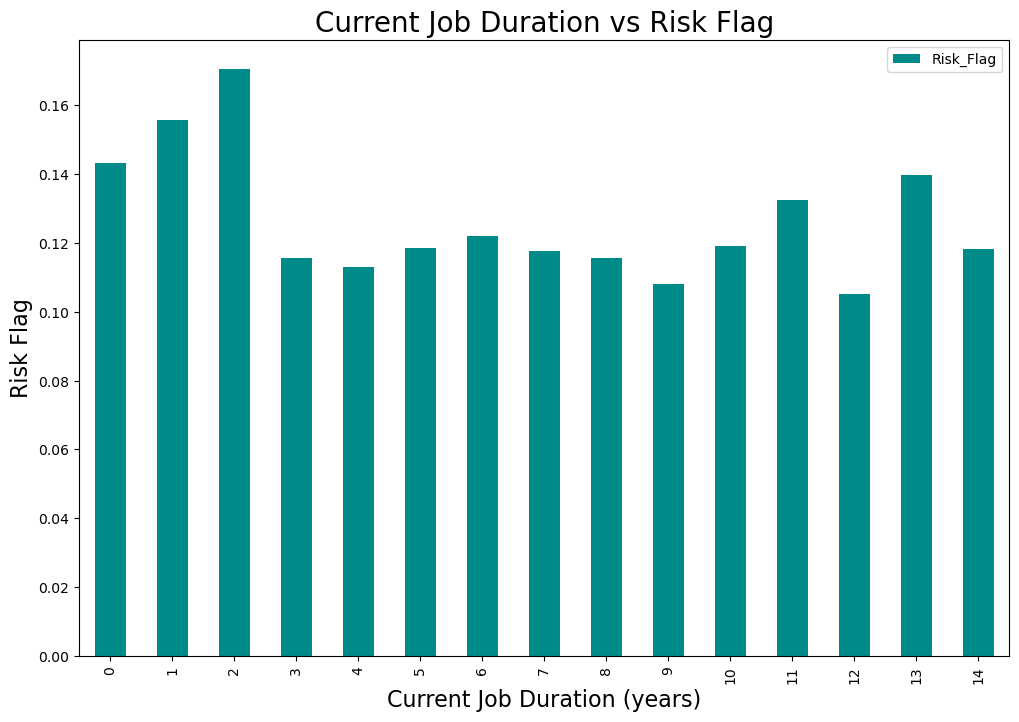

In [42]:
# job in years vs risk flag
top_job_yrs = df.groupby('CURRENT_JOB_YRS').agg({'Risk_Flag':'mean'})
top_job_yrs = top_job_yrs.sort_values('CURRENT_JOB_YRS', ascending = True)
top_job_yrs

top_job_yrs.plot.bar(color = 'darkcyan', figsize=(12,8))
plt.xlabel('Current Job Duration (years)', fontsize = 16)
plt.ylabel('Risk Flag', fontsize = 16)
plt.title('Current Job Duration vs Risk Flag', fontsize=20)

We can see that customers who have current job duration ranging from 0 to 2 years have higher risk score than the rest. The risk score seems to flatten once they have passed the first 2 years in their current job

## Current house in years

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS', ylabel='count'>

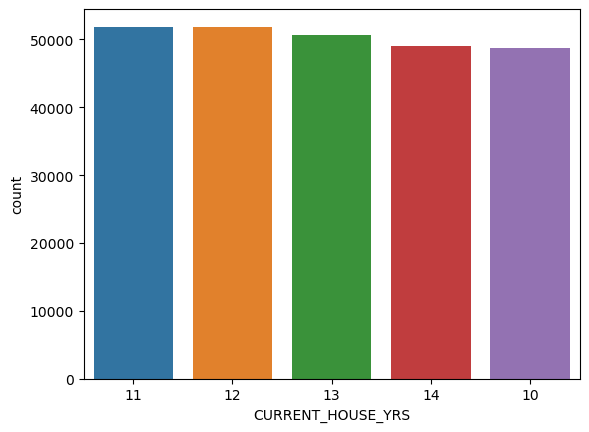

In [44]:
# check variable of current house in years
sns.countplot(data = df, x = 'CURRENT_HOUSE_YRS', order = df['CURRENT_HOUSE_YRS'].value_counts().index)

Text(0.5, 1.0, 'Current House Duration vs Risk Flag')

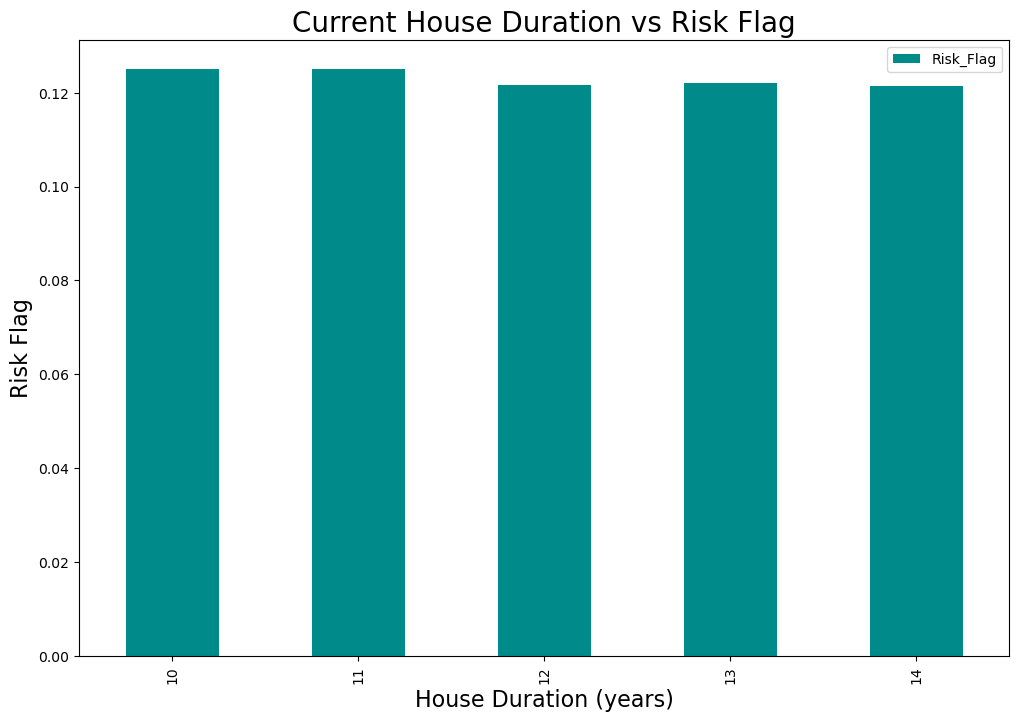

In [45]:
# house in years vs risk flag
top_house_yrs = df.groupby('CURRENT_HOUSE_YRS').agg({'Risk_Flag':'mean'})
top_house_yrs = top_house_yrs.sort_values('CURRENT_HOUSE_YRS', ascending = True)
top_house_yrs

top_house_yrs.plot.bar(color = 'darkcyan', figsize=(12,8))
plt.xlabel('House Duration (years)', fontsize = 16)
plt.ylabel('Risk Flag', fontsize = 16)
plt.title('Current House Duration vs Risk Flag', fontsize=20)

# Modelling Preparation

## Data Splitting

In [46]:
# Split Data
X = df.drop(['Risk_Flag'], axis = 1)
y = df['Risk_Flag']

In [47]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1000)

## Data Checking

<AxesSubplot:>

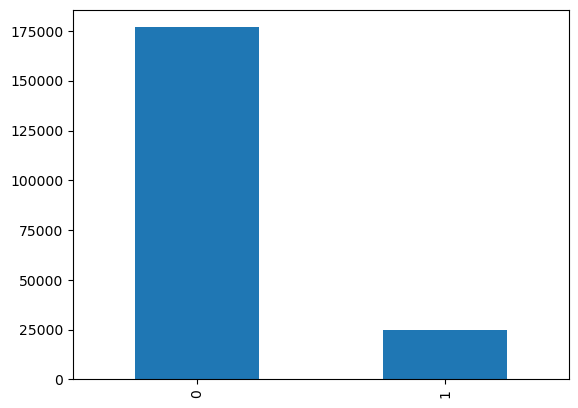

In [48]:
# data check
y_train.value_counts().plot.bar()

The difference between customers who defaulted and didn't default is significant and it will cause imbalanced model. To predict the customers that will default, we need to have balanced model to accurately predict those who will default. Several techniques can be done to handle the imbalanced model like using GMeans function, oversampling technique or undersampling technique.

In [49]:
# dummy dataframe preprocessing
dummy = df.drop(['CITY', 'STATE', 'Profession'], axis=1)
X_dummy= dummy.drop(["Risk_Flag"], axis=1)
y_dummy= dummy["Risk_Flag"]
X_train_dummy, X_test_dummy, y_train_dummy, y_test_dummy = train_test_split(X_dummy, y_dummy, test_size=0.2, stratify=y, random_state=1000)
X_train_dummy = pd.get_dummies(X_train_dummy, drop_first=True)
X_test_dummy = pd.get_dummies(X_test_dummy, drop_first=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_17476\108651394.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  dummy = pd.concat([X_train_dummy, y_train_dummy],1)


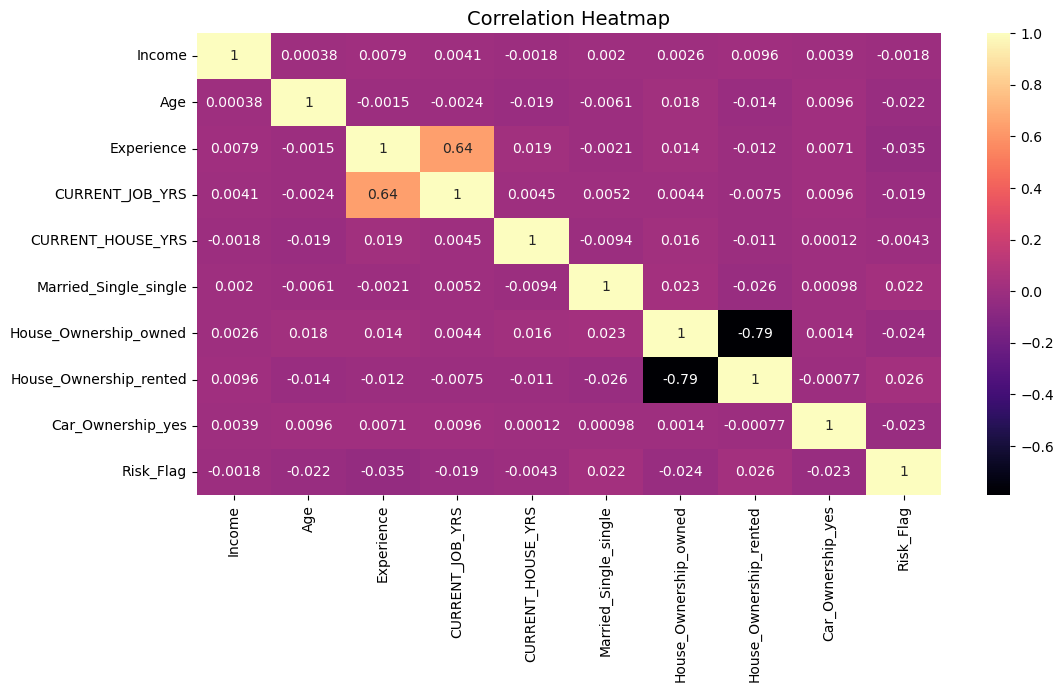

In [50]:
# create dummy dataframe
dummy = pd.concat([X_train_dummy, y_train_dummy],1)

# heatmap for multicolinearity check
plt.figure(figsize=(12,6))
sns.heatmap(dummy.corr(method='spearman'), cmap = 'magma', annot = True)
plt.title('Correlation Heatmap', fontsize = 14);

In this scenario, we assume that any features with a correlation coefficient exceeding 0.80 are suspected of causing multicollinearity. From the graph above, there is no indication of high correlation between the dependent variables.

In [51]:
df = df[df['House_Ownership']!='owned']

In [52]:
df.House_Ownership.value_counts()

rented          231898
norent_noown      7184
Name: House_Ownership, dtype: int64

In [53]:
# Find correlations with the travel insurance and sort
correlations = dummy.corr()['Risk_Flag'].sort_values(ascending=False)

# Display correlations
print('Most Positive Correlations:\n', correlations.head(3))
print('Most Negative Correlations:\n', correlations.tail(3))

Most Positive Correlations:
 Risk_Flag                 1.000000
House_Ownership_rented    0.026487
Married_Single_single     0.021992
Name: Risk_Flag, dtype: float64
Most Negative Correlations:
 Car_Ownership_yes       -0.023215
House_Ownership_owned   -0.023561
Experience              -0.035479
Name: Risk_Flag, dtype: float64


# Modelling

In [54]:
from sklearn.preprocessing import LabelEncoder

In [55]:
features = ["Married_Single","House_Ownership","Car_Ownership","Profession","CITY","STATE"]
label_encoder = LabelEncoder()

for col in features:
    df[col] = label_encoder.fit_transform(df[col])

In [56]:
df.head()

,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,1,0,33,251,13,3,13,0
1,7574516,40,10,1,1,0,43,227,14,9,13,0
2,3991815,66,4,0,1,0,47,8,12,4,10,0
3,6256451,41,2,1,1,1,43,54,17,2,12,1
4,5768871,47,11,1,1,0,11,296,22,3,14,1


In [57]:
# Split Data
X = df.drop(['Risk_Flag'], axis = 1)
y = df['Risk_Flag']

In [58]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1000)

## KNN Classifier

In [59]:
# define KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# fit KNN model with train data
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
# generate hard result from KNN model using test data
knn_result = knn_model.predict(X_test)

# generate probability result from KNN model using test data
knn_proba = knn_model.predict_proba(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Decision Tree Classifier

In [61]:
# define decision tree model
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=1000)

# fit decision tree model with train data
dt_model.fit(X_train, y_train)
     

DecisionTreeClassifier(class_weight='balanced', random_state=1000)

In [62]:
# generate hard result from decision tree model using test data
dt_result = dt_model.predict(X_test)

# generate probability result from decision tree model using test data
dt_proba = dt_model.predict_proba(X_test)

## Random Forest Classifier

In [63]:
# define random forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=1000)

# fit random forest model with train data
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1000)

In [64]:
# generate hard result from random forest model using test data
rf_result = rf_model.predict(X_test)

# generate probability result from random forest model using test data
rf_proba = rf_model.predict_proba(X_test)

## XGBoost Classifier

In [65]:
# define XGBoost model
xgb_model = XGBClassifier(n_estimators=500, max_depth=5, random_state=1000)

# fit XGBoost model with train data
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=500,
              n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1000, ...)

In [66]:
# generate hard result from XGBoost model using test data
xgb_result = xgb_model.predict(X_test)

# generate probability result from XGBoost model using test data
xgb_proba = xgb_model.predict_proba(X_test)

# Model Evaluation

## KNN Classifier

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

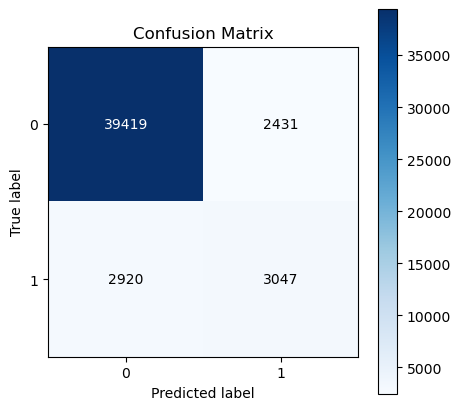

In [67]:
# check confusion matrix using KNN model
skplt.metrics.plot_confusion_matrix(y_test, knn_result, figsize=(5,5))

In [68]:
# check classification report using KNN model
pd.DataFrame(metrics.classification_report(y_test, knn_result, target_names = ['NotDefault', 'Defaulted'], output_dict=True))

,NotDefault,Defaulted,accuracy,macro avg,weighted avg
precision,0.931033,0.556225,0.888094,0.743629,0.884261
recall,0.941912,0.510642,0.888094,0.726277,0.888094
f1-score,0.936441,0.532460,0.888094,0.734450,0.886029
support,41850.000000,5967.000000,0.888094,47817.000000,47817.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

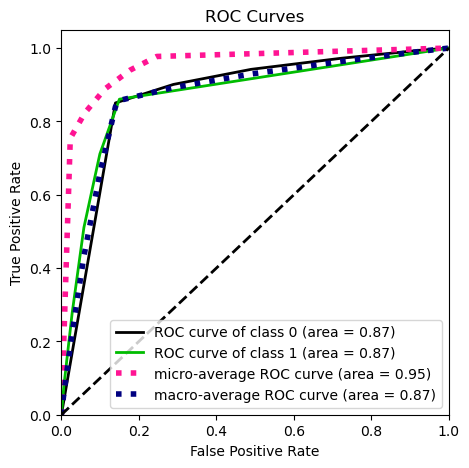

In [69]:
# check ROC curve using KNN model
skplt.metrics.plot_roc_curve(y_test, knn_proba, figsize=(5,5))

## Decision Tree Classifier

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

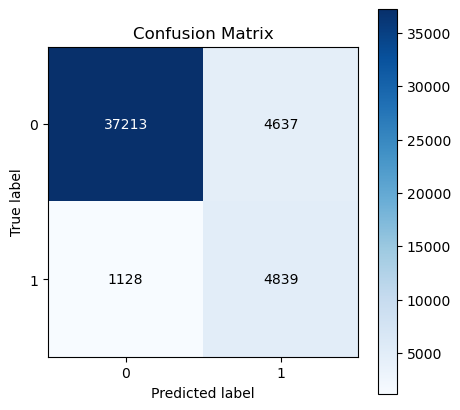

In [70]:
# check confusion matrix using decision tree model
skplt.metrics.plot_confusion_matrix(y_test, dt_result, figsize=(5,5))

In [71]:
# check classification report using decision tree model
pd.DataFrame(metrics.classification_report(y_test, dt_result, target_names = ['NotDefault', 'Defaulted'], output_dict=True))

,NotDefault,Defaulted,accuracy,macro avg,weighted avg
precision,0.970580,0.510659,0.879436,0.740619,0.913187
recall,0.889200,0.810960,0.879436,0.850080,0.879436
f1-score,0.928109,0.626692,0.879436,0.777400,0.890496
support,41850.000000,5967.000000,0.879436,47817.000000,47817.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

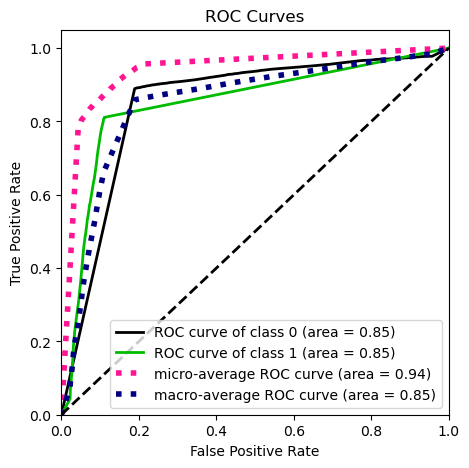

In [72]:
# check ROC curve using decision tree model
skplt.metrics.plot_roc_curve(y_test, dt_proba, figsize=(5,5))

## Random Forest Classifier

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

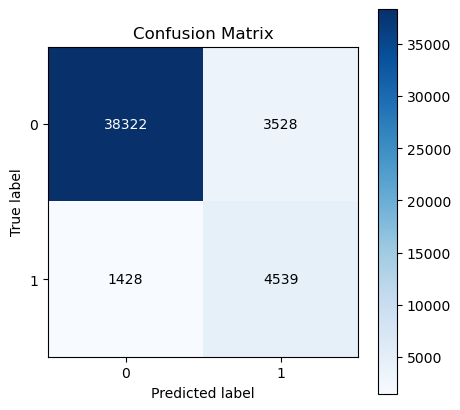

In [73]:
# check confusion matrix using random forest model
skplt.metrics.plot_confusion_matrix(y_test, rf_result, figsize=(5,5))

In [74]:
# check classification report using random forest model
pd.DataFrame(metrics.classification_report(y_test, rf_result, target_names = ['NotDefault', 'Defaulted'], output_dict=True))

,NotDefault,Defaulted,accuracy,macro avg,weighted avg
precision,0.964075,0.562663,0.896355,0.763369,0.913984
recall,0.915699,0.760684,0.896355,0.838191,0.896355
f1-score,0.939265,0.646858,0.896355,0.793061,0.902776
support,41850.000000,5967.000000,0.896355,47817.000000,47817.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

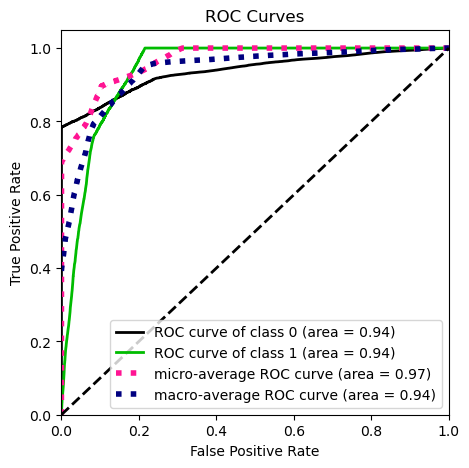

In [75]:
# check ROC curve using random forest model
skplt.metrics.plot_roc_curve(y_test, rf_proba, figsize=(5,5))

## XGBoost Classifier

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

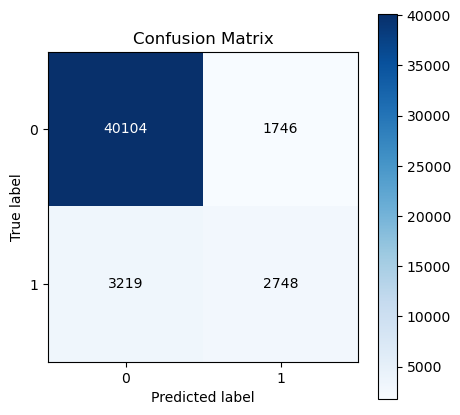

In [76]:
# check confusion matrix using XGBoost model
skplt.metrics.plot_confusion_matrix(y_test, xgb_result, figsize=(5,5))

In [77]:
# check classification report using XGBoost model
pd.DataFrame(metrics.classification_report(y_test, xgb_result, target_names = ['NotDefault', 'Defaulted'], output_dict=True))

,NotDefault,Defaulted,accuracy,macro avg,weighted avg
precision,0.925698,0.611482,0.896167,0.768590,0.886487
recall,0.958280,0.460533,0.896167,0.709406,0.896167
f1-score,0.941707,0.525380,0.896167,0.733543,0.889754
support,41850.000000,5967.000000,0.896167,47817.000000,47817.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

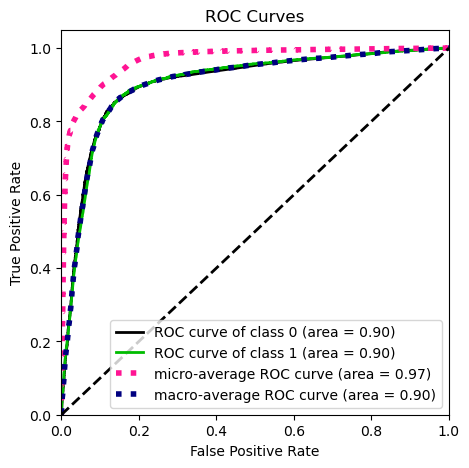

In [78]:
# check ROC curve using XGBoost model
skplt.metrics.plot_roc_curve(y_test, xgb_proba, figsize=(5,5))

# Model Interpretation

After the model evaluation process, we will compare the performance of each model.

- From confusion matrix, the best model is Random Forest with 5056 true predicted followed by decision tree (4745) and KNN (3144).
- From the classification report, the best model is random forest with f1 score on class 1 is about 64.6% followed by decision tree (62.5%) and KNN (53.2%).
- From ROC, the best model is random forest with 94% ROC curve of class 1 followed by KNN (88%) and decision tree (85%)

Since random forest is one of the highest performers, we will use Random Forest Classifier as our model to predict customer who will default given the bank loan.

# Imbalanced Dataset

In [79]:
from imblearn.under_sampling import RandomUnderSampler

# define the undersampling method
rus = RandomUnderSampler(random_state=0)
rus.fit(X,y)

# transform the dataset
X_resampled, y_resampled = rus.fit_resample(X, y)
X_resampled = pd.DataFrame(X_resampled,columns = X.columns)

In [80]:
# train test split
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=1000)

<AxesSubplot:>

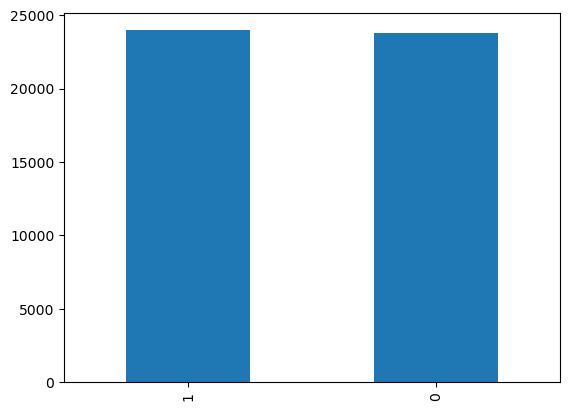

In [81]:
# data check after imbalance treatment
y_train_resampled.value_counts().plot.bar()

In [82]:
# generate dummy variables for the categorical variables
X_train_resampled = pd.get_dummies(X_train_resampled, drop_first = True)
X_test_resampled = pd.get_dummies(X_test_resampled, drop_first = True)

In [83]:
# define random forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=1000)

# fit random forest model with resampled train data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=1000)

In [84]:
# generate hard result from random forest model using resampled test data
rf_result = rf_model.predict(X_test_resampled)

# generate probability result from random forest model using  resampled test data
rf_proba = rf_model.predict_proba(X_test_resampled)

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

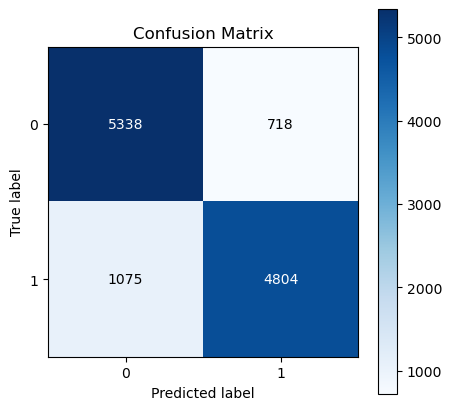

In [85]:
# check confusion matrix using random forest model
skplt.metrics.plot_confusion_matrix(y_test_resampled, rf_result, figsize=(5,5))

In [86]:
# check classification report using random forest model
pd.DataFrame(metrics.classification_report(y_test_resampled, rf_result, target_names = ['NotDefault', 'Defaulted'], output_dict=True))

,NotDefault,Defaulted,accuracy,macro avg,weighted avg
precision,0.832372,0.869975,0.84977,0.851173,0.850894
recall,0.881440,0.817146,0.84977,0.849293,0.849770
f1-score,0.856203,0.842733,0.84977,0.849468,0.849568
support,6056.000000,5879.000000,0.84977,11935.000000,11935.000000


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

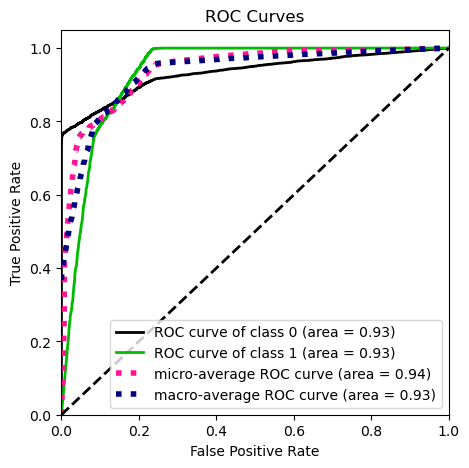

In [87]:
# check ROC curve using random forest model
skplt.metrics.plot_roc_curve(y_test_resampled, rf_proba, figsize=(5,5))

Now the model gets better to predict customers who will default at taking a bank loan. By implementing undersampling method, we improve the true predicted value from 4745 to 4943. We also improve the F1 score on class 1 from 64.6% to 84.1%. The ROC curve of class 1 stays the same at 94%. Further analysis of hyperparameter tuning and imbalanced model can be done to get the best model to know the customers who will default at a bank loan.

# Prediction

In [88]:
train = pd.read_csv('Training Data.csv')

In [89]:
test = pd.read_csv('Test Data.csv')

In [90]:
# check test data
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 28000 non-null  int64 
 1   Income             28000 non-null  int64 
 2   Age                28000 non-null  int64 
 3   Experience         28000 non-null  int64 
 4   Married/Single     28000 non-null  object
 5   House_Ownership    28000 non-null  object
 6   Car_Ownership      28000 non-null  object
 7   Profession         28000 non-null  object
 8   CITY               28000 non-null  object
 9   STATE              28000 non-null  object
 10  CURRENT_JOB_YRS    28000 non-null  int64 
 11  CURRENT_HOUSE_YRS  28000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.6+ MB


In [91]:
X = train.drop('Risk_Flag',axis=1)
y = train['Risk_Flag']

In [92]:
# drop unnecessary columns
test.drop('ID', axis = 1, inplace = True)

# rename columns of married/single
test.rename(columns={"Married/Single":"Married_Single"}, inplace=True)

In [93]:
test.head()

,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [94]:
features = ["Married_Single","House_Ownership","Car_Ownership","Profession","CITY","STATE"]
label_encoder = LabelEncoder()

for col in features:
    test[col] = label_encoder.fit_transform(test[col])

In [95]:
# define random forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=1000)

# fit random forest model with resampled train data
rf_model.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(class_weight='balanced', random_state=1000)

In [96]:
# generate predictions from test data using random forest model
predictions = rf_model.predict(test)

In [97]:
predictions = pd.DataFrame(predictions)

In [98]:
test_prediction = pd.concat([test, predictions], axis=1)
test_prediction

,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,0
0,7393090,59,19,1,2,0,26,181,28,4,13,0
1,1215004,25,5,1,2,0,24,131,14,5,10,0
2,8901342,50,12,1,2,0,30,290,14,9,14,0
3,1944421,49,9,0,2,1,1,171,14,3,12,0
4,13429,25,18,1,2,1,12,39,28,13,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,1,2,0,44,90,0,5,10,0
27996,2917765,47,9,1,2,0,47,249,13,9,14,0
27997,8082415,24,5,1,2,0,30,190,14,4,13,0
27998,9474180,51,13,1,2,1,7,47,4,13,14,0


In [99]:
test_prediction.rename(columns = {0:'Risk_Flag'}, inplace=True)
test_prediction

,Income,Age,Experience,Married_Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,7393090,59,19,1,2,0,26,181,28,4,13,0
1,1215004,25,5,1,2,0,24,131,14,5,10,0
2,8901342,50,12,1,2,0,30,290,14,9,14,0
3,1944421,49,9,0,2,1,1,171,14,3,12,0
4,13429,25,18,1,2,1,12,39,28,13,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
27995,9955481,57,13,1,2,0,44,90,0,5,10,0
27996,2917765,47,9,1,2,0,47,249,13,9,14,0
27997,8082415,24,5,1,2,0,30,190,14,4,13,0
27998,9474180,51,13,1,2,1,7,47,4,13,14,0


In [100]:
# check current working directory
import os
os.getcwd()

'D:\\Dibimbing\\Final Project'

In [103]:
# save prediction data in csv file
test_prediction.to_csv('Bank_Loan_Prediction.csv', index = False)

# Business Simulation

Random forest machine learning model is used to predict the customers that will default so that the bank can make better decision at approving the loan of the customers. Now, we will make business simulation to compare the ROA calculation without machine learning model and with machine learning model. ROA is often used as parameter of bank's profit.

Below are the assumptions used in this business simulation:

1. Each customer has an average loan of 100,000 USD 

2. The average interest rate for a loan is 10%

3. The interest rate isn't calculated for the customers who defaulted

4. For calculation using machine learning model, the cost is negligible with the assumption bank loan will not be given to the predicted customers that will default

5. Cost calculation is only calculated from the defaulted customers and revenue calculation is only generated from the interest rate

## No Model Performance

These are the conditions:

1. Total customers are 50400 people
2. Total customers who defaulted are 6199 people
3. Total customers who didn't default are 44,201 people

ROA Calculation

1. Total Asset: 50,400 x 100,000 USD = 5,040,000,000 USD
2. Cost: 6,199 x 100,000 USD = 619,900,000 USD
3. Revenue: 10% x 44,201 x 100,000 USD = 442,010,000 USD
4. ROA: (442,010,000 - 619,900,000) / 5,040,000,000 = -3.5%

## With Model Performance

These are the conditions:

1. Total customers are 5,655 people
2. Total customers who defaulted are 4,943 people
3. Total customers who didn't default are 712 people

ROA Calculation

1. Total Asset: 5,655 x 100000 USD = 565,500,000 USD
2. Cost: 4,943 x 100,000 USD = 494,300,000 USD
3. Revenue: 10% x 712 x 100,000 USD = 7,120,000 USD
4. ROA: 7,120,000 / 565,500,000 = 1.25%

# Conclusion and Recommendation

- Conclusion:
1. The main factors that contribute to the possible defaulters' risk flag of bank loan are low years of experience, rented house ownership, no car ownership, and single marital status respectively. 
2. The best model to predict default customers is random forest undersampling model with 84.1% by F1 score and 94% ROC score. 3. By using this machine learning model, we can increase the ROA from -3.5% to 1.25% with business assumption

- Recommendation:
1. Bank can develop customers loan products for all ages without concern
2. Bank can consider to implement stricter loan terms and conditions for customers that are single, has low years of experience, do not own car and currently taking a house rental to reduce loan risk potential